(array([ 57., 394.,  56., 125., 149., 210.,  76.,   0.,   0.,   9.]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

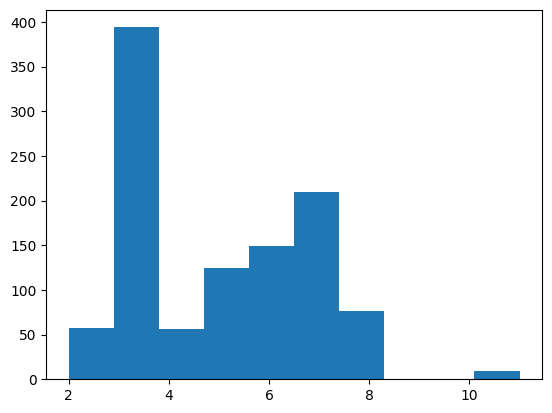

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

with open('/mnt/fs0/haw027/b3d_ipe/test/annotated_ann.json') as f:
    x = json.load(f)

nums = {}
for trial_name, info in x.items():
    num_obj = len(info['scene'][0]['objects'])
    nums[trial_name] = num_obj
plt.hist(nums.values())

In [4]:
max(nums, key=nums.get)

'pilot_dominoes_4mid_tdwroom_0003'

In [5]:
output = dict(sorted(nums.items(), key=lambda item: item[1], reverse=True))

# printing output
print(output)

{'pilot_dominoes_4mid_tdwroom_0003': 11, 'pilot_dominoes_4mid_tdwroom_0007': 11, 'pilot_dominoes_4mid_tdwroom_0021': 11, 'pilot_dominoes_4mid_tdwroom_0008': 11, 'pilot_dominoes_4mid_tdwroom_0014': 11, 'pilot_dominoes_4mid_tdwroom_0018': 11, 'pilot_dominoes_4mid_tdwroom_0004': 11, 'pilot_dominoes_4mid_tdwroom_0019': 11, 'pilot_dominoes_4mid_tdwroom_0015': 11, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom1_0037': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom_small_rings_0020': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom_small_rings_0011': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom1_0033': 8, 'pilot_linking_nl6_aNone_bCone_occ1_dis1_boxroom_0032': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom1_0023': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom_small_rings_0028': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom1_0012': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom_small_rings_0029': 8, 'pilot_linking_nl1-8_mg000_aCylcap_bCyl_tdwroom1_0013': 8, 'pilo

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

with open('/mnt/fs0/haw027/b3d_ipe/test/annotated_ann.json') as f:
    x = json.load(f)


acc_curve_new = {}
topk = 1
correct = []
path = '/home/haw027/code/ADEPT-Model/new_output/default_derender/inference/annotated_physics_human'
for path, dirs, files in os.walk(path):
    for name in (files + dirs):
        if name.endswith('json'):
            full_path = os.path.join(path, name)
            trial_name = full_path.split('/')[-1][:-5]
            gt = x[trial_name]['scene'][0]['objects']
            with open(full_path) as f:
                this_trial = json.load(f)
                pred = this_trial['scene'][0]['objects']
                assert len(pred) == len(gt)
                for i, (pred_type, gt_type) in enumerate(zip(pred, gt)):
                    try:
                        assert gt_type['type'] == pred_type['type'][0]
                    except:
                        print(f"{trial_name} {i} {gt_type['type']} {pred_type['type']}")
                    correct.append(gt_type['type'] in pred_type['type'][:topk])
                
    acc = np.array(correct).sum()/len(correct)
    acc_curve_new[topk] = acc


pilot_towers_nb4_fr015_SJ000_gr01_mono1_dis0_occ0_boxroom_stable_0015 6 pyramid ['cone', 'pyramid', 'bowl', 'octahedron', 'ramp_with_platform_30', 'triangular_prism', 'sphere', 'pentagon', 'platonic', 'cube', 'torus', 'cylinder', 'pipe']
pilot_it2_collision_non-sphere_tdw_1_dis_1_occ_0025 1 pipe ['cube', 'pentagon', 'pyramid', 'pipe', 'cylinder', 'triangular_prism', 'sphere', 'platonic', 'octahedron', 'ramp_with_platform_30', 'bowl', 'torus', 'cone']
pilot_it2_collision_non-sphere_tdw_1_dis_1_occ_0025 2 cone ['pyramid', 'cone', 'cube', 'ramp_with_platform_30', 'sphere', 'bowl', 'octahedron', 'platonic', 'torus', 'triangular_prism', 'pipe', 'pentagon', 'cylinder']
pilot_towers_nb4_fr015_SJ000_gr01_mono0_dis1_occ1_tdwroom_unstable_0034 4 cube ['cylinder', 'cube', 'triangular_prism', 'torus', 'pipe', 'pyramid', 'cone', 'pentagon', 'platonic', 'ramp_with_platform_30', 'octahedron', 'sphere', 'bowl']
pilot_towers_nb4_fr015_SJ000_gr01_mono0_dis1_occ1_tdwroom_unstable_0034 6 pipe ['cube', 'sp

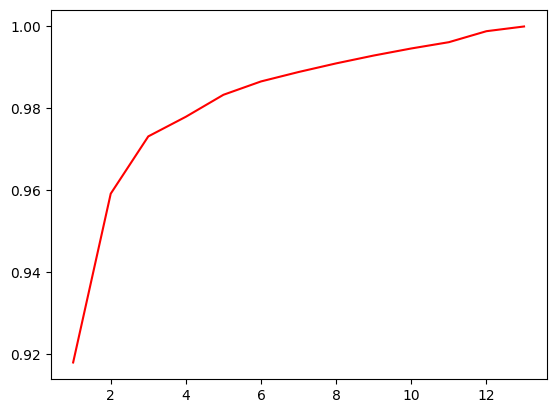

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

with open('/mnt/fs0/haw027/b3d_ipe/test/annotated_ann.json') as f:
    x = json.load(f)


acc_curve_new = {}
for topk in range(1,14):
    correct = []
    path = '/home/haw027/code/ADEPT-Model/new_output/default_derender/inference/annotated_physics_human'
    for path, dirs, files in os.walk(path):
        for name in (files + dirs):
            if name.endswith('json'):
                full_path = os.path.join(path, name)
                trial_name = full_path.split('/')[-1][:-5]
                gt = x[trial_name]['scene'][0]['objects']
                with open(full_path) as f:
                    this_trial = json.load(f)
                    pred = this_trial['scene'][0]['objects']
                    assert len(pred) == len(gt)
                    for i, (pred_type, gt_type) in enumerate(zip(pred, gt)):
                        try:
                            assert gt_type['type'] in pred_type['type']
                        except:
                            print(f"{trial_name} {i} {gt_type['type']} {pred_type['type']}")
                        correct.append(gt_type['type'] in pred_type['type'][:topk])
                
    acc = np.array(correct).sum()/len(correct)
    acc_curve_new[topk] = acc



T = np.array(list(acc_curve_new.keys()))
acc_new = np.array(list(acc_curve_new.values()))
# acc_old = np.array(list(acc_curve_old.values()))

plt.plot(T, acc_new, c='red')
# plt.plot(T, acc_old, c='blue')
plt.show()

In [41]:
import os

path = '/mnt/fs0/haw027/b3d_ipe/train'
for path, dirs, files in os.walk(path):
    for name in (files + dirs):
        if name.endswith('png'):
            full_path = os.path.join(path, name)
            trial_name = full_path.split('/')[-3]
            new_path = os.path.join('/'.join(full_path.split('/')[:-1]), trial_name+'_'+full_path.split('/')[-1])
            # print(full_path, '\n', new_path, '\n')
            os.rename(full_path, new_path)
            

In [22]:
import h5py
import numpy as np

hdf5_file_path = '/mnt/fs5/rahul/lf_0/contain_all_movies/pilot-containment-multi-bowl/0271.hdf5'
frame = 8

In [23]:
with h5py.File(hdf5_file_path, "r") as f:
    object_ids = np.array(f['static']['object_ids'])
    model_names = np.array(f['static']['model_names'])
    distractors = np.array(f['static']['distractors']) if np.array(f['static']['distractors']).size != 0 else None
    occluders = np.array(f['static']['occluders']) if np.array(f['static']['occluders']).size != 0 else None
    distractor_ids = np.concatenate([np.where(model_names==distractor)[0] for distractor in distractors], axis=0).tolist() if distractors else []
    occluder_ids = np.concatenate([np.where(model_names==occluder)[0] for occluder in occluders], axis=0).tolist() if occluders else []
    excluded_model_ids = distractor_ids+occluder_ids
    included_model_ids = [idx for idx in range(len(object_ids)) if idx not in excluded_model_ids]

    scales = np.array(f['static']['scale'])
    for key in f['frames'].keys():
        if int(key)!=frame:
            continue
        locations = np.array(f['frames'][key]['objects']['positions_cam0'])
        rotations = np.array(f['frames'][key]['objects']['rotations_cam0'])
        for i in included_model_ids:
            print(model_names[i])
            print(locations[i])
            print(rotations[i])
            print(scales[i])
            
            

b'cube'
[0. 0. 0.]
[-0. -0. -0.  1.]
[3.   0.02 3.  ]
b'sphere'
[-0.31825554  0.05578177 -0.00268321]
[-0.01089607  0.0380776   0.34796533  0.9366705 ]
[0.3 0.3 0.3]
b'bowl'
[ 0.03965302  0.02326308 -0.00065343]
[ 0.00391601 -0.00355379 -0.01444464  0.99988174]
[0.71768916 0.71768916 0.71768916]
b'bowl'
[-1.4551915e-10  2.3779315e-01 -8.7311491e-11]
[-0. -0. -0.  1.]
[0.5014182 0.5014182 0.5014182]
b'sphere'
[ 0.05743901  0.44778448 -0.00571735]
[-2.5611369e-09 -1.6123548e-01 -8.3819023e-09  9.8691601e-01]
[0.3203001 0.3203001 0.3203001]


In [ ]:
attributes:  {'type': tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'location': tensor([-1.4552e-10,  2.3779e-01, -8.7311e-11]), 'rotation': tensor([-0., -0., -0., 1.]), 'scale': tensor([0
.5014, 0.5014, 0.5014])}         

In [3]:
a = '/mnt/fs0/haw027/b3d_ipe/train/images/pilot_dominoes_4midRM1_tdwroom_2_0134/imgs'
a.split('/')[-2]

'pilot_dominoes_4midRM1_tdwroom_2_0134'

In [5]:
import os
basename = 0000
index = 0
os.path.join('/mnt/fs0/haw027/b3d_ipe/temp', a.split('/')[-2])

'/mnt/fs0/haw027/b3d_ipe/temp/pilot_dominoes_4midRM1_tdwroom_2_0134'

In [1]:
import yaml
import json
import os
from easydict import EasyDict
from PIL import Image
import pycocotools.mask as mask_util


def mkdir(path):
    if not os.path.exists(path):
        os.mkdir(path)
    return path


def read_serialized(file_name):
    """Read json and yaml file"""
    if file_name is not None:
        with open(file_name, "r") as f:
            if file_name.endswith(".json"):
                x = json.load(f)
            elif file_name.endswith(".yaml"):
                x = yaml.full_load(f)
            else:
                raise FileNotFoundError
    if isinstance(x, dict):
        return EasyDict(x)
    else:
        return x


In [12]:
import json

with open('/mnt/fs0/haw027/b3d_ipe/annotated_ann.json') as f:
    x = json.load(f)
    
types = []
for trial, info in x.items():
    for frame in info['scene']:
        for object in frame['objects']:
            types.append(object['type'])
print(set(types))

{'cone', 'pentagon', 'cylinder', 'octahedron', 'cube', 'torus', 'sphere', 'ramp_with_platform_30', 'pipe', 'platonic', 'triangular_prism', 'pyramid', 'bowl'}


In [4]:
from os import listdir
import h5py
import io
import os
import numpy as np
from os.path import isfile, join
import json
import yaml


x = {}
path = '/mnt/fs0/haw027/b3d_ipe/'
onlyjson = [f for f in listdir(path) if isfile(join(path, f)) and join(path, f).endswith('.json')]
for file in onlyjson:
    print(join(path, file))
    with open(join(path, file)) as f:
        y = json.load(f)
    x = x | y

/mnt/fs0/haw027/b3d_ipe/annotated_ann_collide.json
/mnt/fs0/haw027/b3d_ipe/annotated_ann_dominoes.json
/mnt/fs0/haw027/b3d_ipe/annotated_ann_roll.json
/mnt/fs0/haw027/b3d_ipe/annotated_ann_drop.json
/mnt/fs0/haw027/b3d_ipe/annotated_ann_link.json
/mnt/fs0/haw027/b3d_ipe/annotated_ann_contain.json
/mnt/fs0/haw027/b3d_ipe/annotated_ann_support.json


In [6]:
len(x)

14834

In [8]:
with open('/mnt/fs0/haw027/b3d_ipe/annotated_ann.json', 'w') as f:
    json.dump(x, f)

In [5]:
# anns_file = read_serialized('/home/haw027/code/ADEPT-Model/data_sample/train/train_00201/train_00201_ann.yaml')
anns_file = read_serialized('/ccn2/u/haw027/b3d_ipe/annotated_ann.json')

In [6]:
anns_file

{'0000': {'scene': [{'objects': [{'location': [1.2999999523162842, 0.0, 0.0],
      'scale': [0.699999988079071, 0.019999999552965164, 0.699999988079071],
      'type': 'cube',
      'rotation': [-0.0, -0.0, -0.0, 1.0],
      'mask': {'size': [350, 350],
       'counts': 'Y\\73f:5L4L4K5L4K5L3L5L4K5N200000000000O100000O10000000000000O10000000O1000000000O100000000000O10000000O10000000000000O1000O100000000000000000OE<_Ob0^O_fg2'}},
     {'location': [0.5000057220458984,
       0.000521540641784668,
       6.034828402334824e-06],
      'scale': [0.25, 0.5, 0.25],
      'type': 'torus',
      'rotation': [1.6730889456084697e-06,
       -4.8467629909509924e-08,
       2.879665998989367e-07,
       1.0],
      'mask': {'size': [350, 350],
       'counts': 'RUX17e:4L4M2N2O1NFjENV:1kE0S:0oEOQ:1oEOQ:0PF1n90RF0n90RF0n9OTF0l90SF1m9OSF1m9OSF0n90RF0o90oE1Q:OnE2R:OmE0U:0hE1Y::1N2N2N4K4InlU2'}},
     {'location': [-0.49999991059303284,
       1.7881393432617188e-07,
       -2.6411726139485836e-09],
  

In [8]:
# anns_file.scene
anns_file['0000'].scene


[{'objects': [{'location': [1.2999999523162842, 0.0, 0.0],
    'scale': [0.699999988079071, 0.019999999552965164, 0.699999988079071],
    'type': 'cube',
    'rotation': [-0.0, -0.0, -0.0, 1.0],
    'mask': {'size': [350, 350],
     'counts': 'Y\\73f:5L4L4K5L4K5L3L5L4K5N200000000000O100000O10000000000000O10000000O1000000000O100000000000O10000000O10000000000000O1000O100000000000000000OE<_Ob0^O_fg2'}},
   {'location': [0.5000057220458984,
     0.000521540641784668,
     6.034828402334824e-06],
    'scale': [0.25, 0.5, 0.25],
    'type': 'torus',
    'rotation': [1.6730889456084697e-06,
     -4.8467629909509924e-08,
     2.879665998989367e-07,
     1.0],
    'mask': {'size': [350, 350],
     'counts': 'RUX17e:4L4M2N2O1NFjENV:1kE0S:0oEOQ:1oEOQ:0PF1n90RF0n90RF0n9OTF0l90SF1m9OSF1m9OSF0n90RF0o90oE1Q:OnE2R:OmE0U:0hE1Y::1N2N2N4K4InlU2'}},
   {'location': [-0.49999991059303284,
     1.7881393432617188e-07,
     -2.6411726139485836e-09],
    'scale': [0.3499999940395355, 0.3499999940395355, 0.349

In [9]:
# image = anns_file.scene[0]
image = anns_file['0000'].scene[0]
for obj in image.objects:
    print(obj)
    area = int(mask_util.area(obj.mask))
    print(area)

{'location': [1.2999999523162842, 0.0, 0.0], 'scale': [0.699999988079071, 0.019999999552965164, 0.699999988079071], 'type': 'cube', 'rotation': [-0.0, -0.0, -0.0, 1.0], 'mask': {'size': [350, 350], 'counts': 'Y\\73f:5L4L4K5L4K5L3L5L4K5N200000000000O100000O10000000000000O10000000O1000000000O100000000000O10000000O10000000000000O1000O100000000000000000OE<_Ob0^O_fg2'}}
3142
{'location': [0.5000057220458984, 0.000521540641784668, 6.034828402334824e-06], 'scale': [0.25, 0.5, 0.25], 'type': 'torus', 'rotation': [1.6730889456084697e-06, -4.8467629909509924e-08, 2.879665998989367e-07, 1.0], 'mask': {'size': [350, 350], 'counts': 'RUX17e:4L4M2N2O1NFjENV:1kE0S:0oEOQ:1oEOQ:0PF1n90RF0n90RF0n9OTF0l90SF1m9OSF1m9OSF0n90RF0o90oE1Q:OnE2R:OmE0U:0hE1Y::1N2N2N4K4InlU2'}}
445
{'location': [-0.49999991059303284, 1.7881393432617188e-07, -2.6411726139485836e-09], 'scale': [0.3499999940395355, 0.3499999940395355, 0.3499999940395355], 'type': 'sphere', 'rotation': [1.7601996660232544e-07, 6.91157765686512e-07, 1

In [ ]:
from PIL import Image
from os import listdir
import h5py
import io
import os
import numpy as np
from os.path import isfile, join
import json
from copy import deepcopy
from functools import reduce


def makedir(path):
    if not os.path.exists(path):
        # print(f"making dir {path}")
        os.makedirs(path)

def color_image(depth_map, area, color):
    _depth_map = deepcopy(depth_map)
    _depth_map[area] = color
    return _depth_map
        
def get_mask_area(seg_img, colors):
    arrs = []
    for color in colors:
        arr = seg_img == color
        arr = arr.min(-1).astype('float32')
        arr = arr.reshape((arr.shape[-1], arr.shape[-1])).astype(bool)
        arrs.append(arr)
    return reduce(np.logical_or, arrs)

other_scenarios = ['collide', 'contain', 'dominoes', 'drop', 'roll', 'support']
scenarios = ['link']
source_path = '/mnt/fs5/rahul/lf_0/'
save_path = '/ccn2/u/haw027/b3d_ipe'
width = 350
height = 350

file = {}
for scenario in scenarios:
    print(scenario)
    scenario_path = join(source_path, scenario+'_all_movies')
    onlyhdf5 = [f for f in listdir(scenario_path) if isfile(join(scenario_path, f)) and join(scenario_path, f).endswith('.hdf5')]
    for hdf5_file in onlyhdf5:
        trial_name = hdf5_file[:-5]
        print("dir: ", join(save_path, trial_name, "imgs"))
        makedir(join(save_path, trial_name, "imgs"))
        file[trial_name] = {}
        file[trial_name]['scene'] = []
        print('\t', trial_name)
        hdf5_file_path = join(scenario_path, hdf5_file)
        base_id, base_type, attachment_id, attachent_type, attachment_fixed, use_attachment, use_base, use_cap, cap_id = None, None, None, None, None, None, None, None, None
        with h5py.File(hdf5_file_path, "r") as f:
            im_seg = np.array(Image.open(io.BytesIO(f['frames']['0000']['images']['_id_cam0'][:])))

            # extract object info
            object_ids = np.array(f['static']['object_ids'])
            model_names = np.array(f['static']['model_names'])
            assert len(object_ids) == len(model_names)
            distractors = np.array(f['static']['distractors']) if np.array(f['static']['distractors']).size != 0 else None
            occluders = np.array(f['static']['occluders']) if np.array(f['static']['occluders']).size != 0 else None
            assert distractors==None and occluders==None
            
            object_segmentation_colors = np.array(f['static']['object_segmentation_colors'])
            if "base_id" in np.array(f['static']) and "attachment_id" in np.array(f['static']):
                base_id = np.array(f['static']['base_id'])
                base_type = np.array(f['static']['base_type'])
                attachment_id = np.array(f['static']['attachment_id'])
                attachent_type = np.array(f['static']['attachent_type'])
                attachment_fixed = np.array(f['static']['attachment_fixed'])
                use_attachment = np.array(f['static']['use_attachment'])
                link_type = np.array(f['static']['link_type'])
                use_base = np.array(f['static']['use_base'])
                use_cap = np.array(f['static']['use_cap'])
                assert attachment_id.size==1
                assert base_id.size==1
                attachment_id = attachment_id.item()
                base_id = base_id.item()
                if use_cap:
                    cap_id = attachment_id+1

        im_seg_copy = deepcopy(im_seg)
        interesting_ids = [base_id, attachment_id]
        if cap_id:
            interesting_ids.append(cap_id)

        if scenario in other_scenarios:
            assert len(interesting_ids) == 0
            
        if len(interesting_ids) == 0:
            continue

        for i, o_id in enumerate(interesting_ids):
            color = object_segmentation_colors[object_ids.tolist().index(o_id)]
            
            area = get_mask_area(im_seg, [color])
            if i == 0:
                consistent_color = color
            else:
                im_seg_copy = color_image(im_seg_copy, area, consistent_color)
        counter = np.unique(im_seg_copy.reshape(-1, im_seg_copy.shape[2]), axis=0)
        num_obj = counter.shape[0]-1
        assert num_obj == len(object_ids)-len(interesting_ids)
        im = Image.fromarray(im_seg_copy)
        im.save("your_file.jpeg")

In [1]:
from PIL import Image
from os import listdir
import h5py
import io
import os
import numpy as np
from os.path import isfile, join
import pycocotools.mask as mask_util
import json
import yaml

def makedir(path):
    if not os.path.exists(path):
        # print(f"making dir {path}")
        os.makedirs(path)

def get_mask_area(color, seg_img):
    arr = seg_img == color
    arr = arr.min(-1).astype('float')
    arr = arr.reshape((arr.shape[-1], arr.shape[-1]))
    return np.asfortranarray(arr.astype(bool))

def write_serialized(var, file_name):
    """Write json and yaml file"""
    assert file_name is not None
    with open(file_name, "w") as f:
        if file_name.endswith(".json"):
            json.dump(var, f, indent=4)
        elif file_name.endswith(".yaml"):
            yaml.safe_dump(var, f, indent=4)
        else:
            raise FileNotFoundError
        
scenarios = ['collide', 'contain', 'dominoes', 'drop', 'link', 'roll', 'support']
source_path = '/ccn2/u/rmvenkat/data/testing_physion/regenerate_from_old_commit/readout_consolidated/data_balanced'
save_path = '/ccn2/u/haw027/b3d_ipe'
width = 350
height = 350

file = {}
for scenario in scenarios:
    print(scenario)
    scenario_path = join(source_path, scenario+'_all_movies')
    onlyhdf5 = [f for f in listdir(scenario_path) if isfile(join(scenario_path, f)) and join(scenario_path, f).endswith('.hdf5')]
    for hdf5_file in onlyhdf5:
        trial_name = hdf5_file[:-5]
        print("dir: ", join(save_path, trial_name, "imgs"))
        makedir(join(save_path, trial_name, "imgs"))
        file[trial_name] = {}
        file[trial_name]['scene'] = []
        print('\t', trial_name)
        hdf5_file_path = join(scenario_path, hdf5_file)
        with h5py.File(hdf5_file_path, "r") as f:
            object_ids = np.array(f['static']['object_ids'])
            model_names = np.array(f['static']['model_names'])
            distractors = np.array(f['static']['distractors']) if np.array(f['static']['distractors']).size != 0 else None
            occluders = np.array(f['static']['occluders']) if np.array(f['static']['occluders']).size != 0 else None
            distractor_ids = np.concatenate([np.where(model_names==distractor)[0] for distractor in distractors], axis=0).tolist() if distractors else []
            occluder_ids = np.concatenate([np.where(model_names==occluder)[0] for occluder in occluders], axis=0).tolist() if occluders else []
            excluded_model_ids = distractor_ids+occluder_ids
            included_model_ids = [idx for idx in range(len(object_ids)) if idx not in excluded_model_ids]

            object_segmentation_colors = np.array(f['static']['object_segmentation_colors'])
            scales = np.array(f['static']['scale'])
            for key in f['frames'].keys():
                if int(key)>10:
                    continue
                im = np.array(Image.open(io.BytesIO(f['frames'][key]['images']['_img_cam0'][:])))
                im = Image.fromarray(im)
                downsampled_im = im.resize((width, height), Image.BICUBIC)
                downsampled_im.save(join(save_path, trial_name, "imgs", f"{key}.png"))

                locations = np.array(f['frames'][key]['objects']['positions_cam0'])
                rotations = np.array(f['frames'][key]['objects']['rotations_cam0'])
                im_seg = np.array(Image.open(io.BytesIO(f['frames'][key]['images']['_id_cam0'][:])).resize((width, height), Image.BICUBIC))

                this_frame = {}
                this_frame['objects'] = []
                for i in included_model_ids:
                    obj_info = {}
                    obj_info['type'] = model_names[i].decode('UTF-8')
                    obj_info['location'] = locations[i].tolist()
                    obj_info['rotation'] = rotations[i].tolist()
                    obj_info['scale'] = scales[i].tolist()
                    obj_mask = mask_util.encode(get_mask_area(im_seg, object_segmentation_colors[i]))
                    obj_info['mask'] = {'size': obj_mask['size'], 'counts': obj_mask['counts'].decode('UTF-8')}
                    this_frame['objects'].append(obj_info)
                    
                    # one = get_mask_area(im_seg, object_segmentation_colors[i])
                    # two = mask_util.decode(obj_info['mask'])
                    # assert (one == two).all()
                    # one = Image.fromarray(one)
                    # one.save(join(save_path, trial_name, "imgs", f"{key}_{i}.png"))
                    # two = Image.fromarray(two)
                    # two.save(join(save_path, trial_name, "imgs", f"{key}_{i}_{i}.png"))
                file[trial_name]['scene'].append(this_frame)

write_serialized(file, join(save_path, 'annotated_ann.json'))

collide
	 pilot_it2_collision_simple_box_1_dis_1_occ_0220
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
	 pilot_it2_collision_non-sphere_box_0296
0
1
2


KeyboardInterrupt: 